# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>


- O dataset que vamos utilizar para o nosso estudo será o dataset "qualidade_do_ar.csv".
    O conjunto de dados contém 9358 resultados médios de 5 sensores químicos de um dispositivo multisensor (PTXX.SX). O dispositivo estava localizado a nível da rua, dentro de uma cidade significativamente poluída. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano). Valores ausentes são marcados com o valor -200. A medida de outros sensores também está disponível e algumas podem ser redundantes. A variável chave a ser analisada é PT08.S1 (CO), concentração de CO na atmosfera.



<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    
1.	Date (DD/MM/YYYY) 
2.	Time (HH.MM.SS) 
3.	PT08.S1 (CO) – Variável de predição
4.	Non Metanic HydroCarbons Concentration (mg/m^3)
5.	4 Benzene Concentration (mg/m^3) 
6.	PT08.S2 (NMHC) 
7.	NOx Concentration (ppb) 
8.	PT08.S3 (NOx) 
9.	8 NO2 Concentration (mg/m^3) 
10.	PT08.S4 (NO2s) 
11.	PT08.S5 (O3) 
12.	Temperature (C) 
13.	Relative Humidity (%) 
14.	AH Absolute Humidity 
    

# Iniciando a Importação e Análise Exploratória de Dados.

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importando o DataSet e definindo o separador decimal para ',' e substiuíndo os valores "-200" por valores "N/A".
df_ar = pd.read_csv('qualidade_do_ar.csv', sep=';',decimal=',' ,  keep_default_na=False, na_values = -200 )

# Visualizando as dimensões do dataset original
df_ar.shape

(9357, 14)

In [3]:
# Olhando as 10 primeiras linhas do dataset
df_ar.head(10)

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [4]:
# Olhando os tipos e formato dos dados antes das conversões
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Date             9357 non-null object
Time             9357 non-null object
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB


In [5]:
# Convertendo os tipos de dados de algumas colunas.
df_ar['Date'] = df_ar['Date'].astype('datetime64')

In [6]:
# Olhando os tipos e formato dos dados após das conversões
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1023.5+ KB


In [7]:
# Verificando os valores únicos
df_ar.nunique()

Date              391
Time               24
PT08.S1(CO)      1041
NMHC(GT)          429
C6H6(GT)          407
PT08.S2(NMHC)    1245
NOx(GT)           925
PT08.S3(NOx)     1221
NO2(GT)           283
PT08.S4(NO2)     1603
PT08.S5(O3)      1743
T                 436
RH                753
AH               6683
dtype: int64

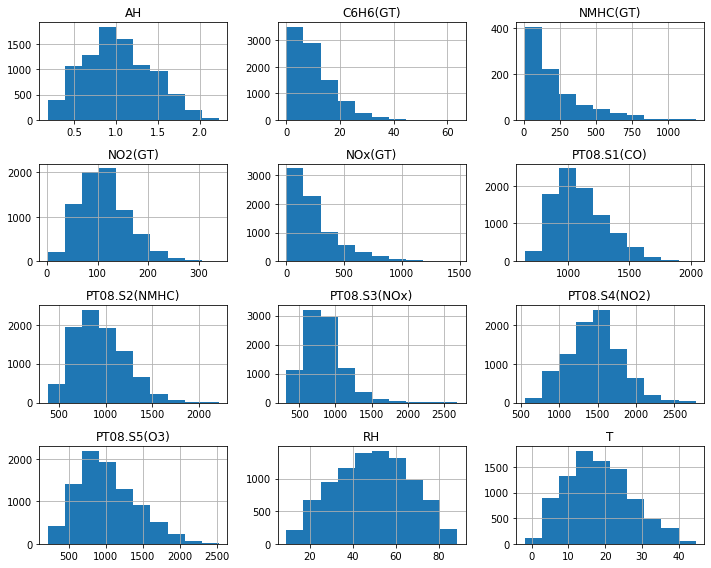

In [8]:
# Distribuição dos atributos dos dataset
df_ar.hist(figsize=(10,8), )
plt.tight_layout()
plt.show()

## Verificando e Tratando os valores nulos e/ou N/A

In [9]:
# Verificando valores nulos.
print('Valores Nulos\n')
print(df_ar.isnull().sum())

# Verificando valores N/A.
print('\nValores N/A \n')
print(df_ar.isna().sum())

Valores Nulos

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Valores N/A 

Date                0
Time                0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [10]:
# Exibindo o percentual de valores N/A por atributo
total = df_ar.isnull().sum().sort_values(ascending=False)
percentual = (df_ar.isna().sum()/df_ar.isna().count()).sort_values(ascending=False)
df_valores_na = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

print('\nPercentual de valores N/A por Atributo')
df_valores_na.head(20)



Percentual de valores N/A por Atributo


,Total,Percentual
NMHC(GT),8443,0.902319
NO2(GT),1642,0.175484
NOx(GT),1639,0.175163
AH,366,0.039115
RH,366,0.039115
T,366,0.039115
PT08.S5(O3),366,0.039115
PT08.S4(NO2),366,0.039115
PT08.S3(NOx),366,0.039115
PT08.S2(NMHC),366,0.039115


### Vamos testar algumas estratégias para tratar os valores N/A.
- Nesses testes vamos utilizar algumas estratégias mais simples para o tratamento dos valores N/A, porém é importante saber que existem algumas técnicas mais avançadas, tais como: analisar correlações, criaçãode  um modelo preditivo para preenchimento dos valores N/A entre outras.


In [11]:
# Como o atributo "PT08.S1(CO)" será a variável que vamos tanter prever, para esse caso não vamos preencher os valores N/A. 
# Vamos remover as linhas em que ele aparece como N/A.
df_ar.dropna(subset=['PT08.S1(CO)'], inplace=True);
df_ar.shape

(8991, 14)

In [12]:
# A primeira será remover do dataset as linhas com valores N/A.
# Como podemos observar no resultado, essa não parece uma ser boa estratégia, pois reduzimos muito o número de observações (851 linhas) e isso pode ser um problema para o criação do modelo.
df_del_valores_na = pd.DataFrame(df_ar.dropna(), copy=True)
df_del_valores_na.shape

(851, 14)

In [13]:
# A segunda será substituir os valores N/A pelo valor da média de cada atributo.
# Essa seria uma estratégia um pouco mais interessante, porém a média é uma medida que pode variar muito na presença de outliers, por isso não vamos adotá-la.
df_media_valores_na = pd.DataFrame(df_ar.fillna(df_ar.mean()), copy=True)
df_media_valores_na.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
# A terceira será substituir os valores N/A pelo valor da mediana de cada atributo.
# Essa também parace uma estratégia interessante. A mediana leva vantagem em relação à média, pois a mediana pode dar uma ideia melhor de um valor típico porque não é tão distorcida por outliers.
# Mas também podemos ter algums problemas caso a curva de distribuiçao seja muito assimétrica, por isso não vamos adotá-la.
df_mediana_valores_na = pd.DataFrame(df_ar.fillna(df_ar.median()), copy=True)
df_mediana_valores_na.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [15]:
# A quarta será substituir os valores N/A pelo valor da moda (valor de maior frequência) de cada atributo.
# Apesar de não se prestar à análise matemática, a moda retorna o valor mais comum no conjunto de dados, o que para o nosso caso parece ser bem interessante.
# Por isso, esse caso vamos utilizar essa estratégia para o preenchimento dos valores N/A.

df_moda_valores_na = pd.DataFrame(df_ar.fillna(df_ar.mode().iloc[0]), copy=True)
df_moda_valores_na.isna().sum()

Date             0
Time             0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [16]:
# Cria um dataset de valores N/A tratado.
df_na_tratado =  pd.DataFrame(df_moda_valores_na, copy=True)


## Verificando e Tratando Outliers

In [17]:
# Observando algumas medidas estatísticas das variáveis numéricas
# Podemos observar que alguns atributos estão com o desvio padrão (std) bem alto o que pode indicar a presença de outliers.
df_na_tratado.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC(GT),8991.0,81.055389,79.236247,7.0000,66.0000,66.0000,66.0000,1189.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),8991.0,215.013569,196.055459,2.0000,89.0000,140.0000,280.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),8991.0,109.453342,43.575470,2.0000,85.0000,97.0000,132.0000,333.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.8000,17.8000,24.4000,44.600


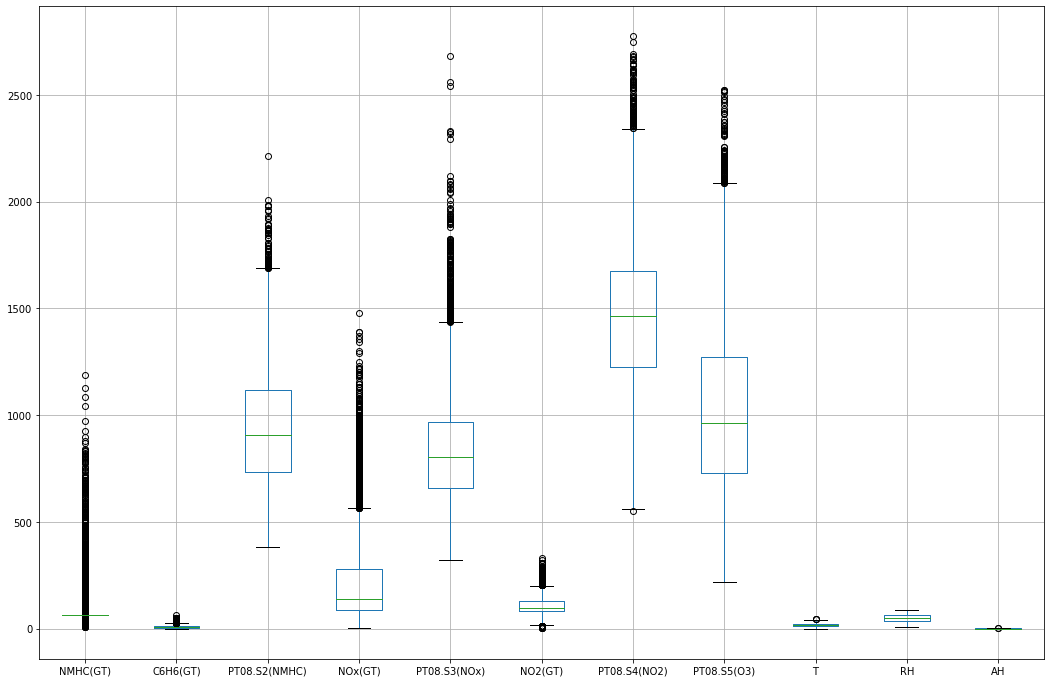

In [18]:
# Vamos plotar os dados dos atributos previsores para verificarmos os dados e indenticar outliers
df_na_tratado.boxplot(figsize=(18,12),column=['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']);

In [19]:
df_na_tratado.to_csv('df_na_tratado.csv', sep=';', decimal=',')

In [20]:
# Verificando outliers com a função Z-Score
#"O escore Z é o número sinalizado de desvios padrão pelo qual o valor de uma observação ou ponto de dados está acima do valor médio do que está sendo observado ou medido."
from scipy import stats

# Mínino de desvios padrão para ser não ser considerado outlier.
threshold = 3
  
def fill_na_outliers(df, coluna, threshold):
    df[coluna] = np.where(np.abs(stats.zscore(df[coluna].values)) > threshold, np.nan, df[coluna])    

In [21]:
# Tratando os outliers de cada dos atibutos previsores.
for col in df_na_tratado.columns[3:]: 
    fill_na_outliers(df_na_tratado, col, threshold)

In [22]:
df_na_tratado.to_csv('df_tratado_outlier.csv', sep=';', decimal=',')

In [23]:
# Verificando a quantidade de valores indetificados como outliers que foram substituídos por N/A
df_na_tratado.isna().sum()

Date               0
Time               0
PT08.S1(CO)        0
NMHC(GT)         207
C6H6(GT)         118
PT08.S2(NMHC)     37
NOx(GT)          183
PT08.S3(NOx)     109
NO2(GT)           76
PT08.S4(NO2)      38
PT08.S5(O3)       37
T                  0
RH                 0
AH                 0
dtype: int64

In [24]:
# Cria o dataframe com tratameno dos outliers.
# Para esse caso onde os valores indetificados como outliers que foram substituídos por N/A, vamos emover do dataset as linhas com valores N/A.
df_tratado = pd.DataFrame(df_na_tratado.dropna(), copy=True)
df_tratado.shape

(8373, 14)

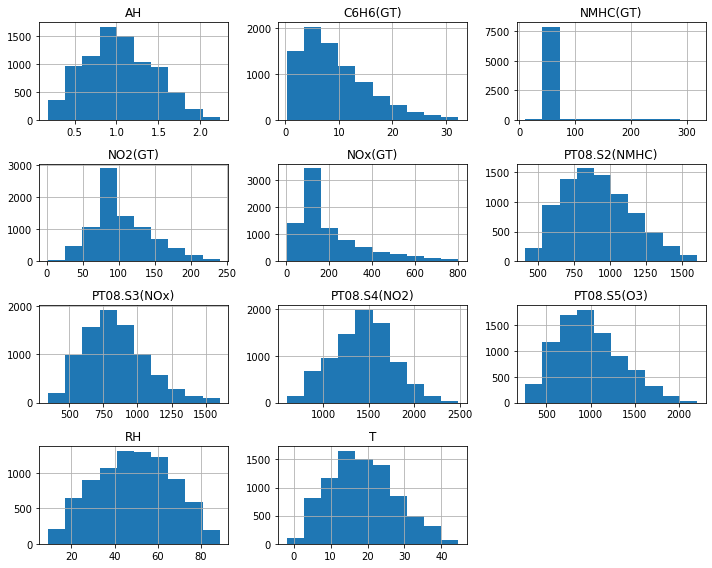

In [25]:
# Distribuição dos atributos dos após o tratamento dos dados
df_tratado.hist(figsize=(10,8), column=['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'])
plt.tight_layout()
plt.show()

In [26]:
df_tratado.to_csv('df_tratado.csv', sep=';', decimal=',')

In [27]:
df_ar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC(GT),887.0,218.607666,206.615130,7.0000,66.0000,145.0000,297.0000,1189.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),7396.0,242.189292,206.312007,2.0000,97.0000,178.0000,321.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),7393.0,112.145137,47.629141,2.0000,77.0000,109.0000,140.0000,333.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.8000,17.8000,24.4000,44.600


In [28]:
df_tratado.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),8373.0,1078.248059,190.363359,667.0000,933.0000,1052.0000,1199.000,1819.000
NMHC(GT),8373.0,70.696525,27.251698,11.0000,66.0000,66.0000,66.000,318.000
C6H6(GT),8373.0,9.288690,6.289289,0.3000,4.3000,7.9000,12.900,32.300
PT08.S2(NMHC),8373.0,915.801385,238.530085,412.0000,730.0000,893.0000,1080.000,1604.000
NOx(GT),8373.0,195.709423,160.574837,2.0000,89.0000,131.0000,262.000,803.000
PT08.S3(NOx),8373.0,839.146423,227.102041,345.0000,676.0000,818.0000,974.000,1604.000
NO2(GT),8373.0,106.420757,39.653481,2.0000,84.0000,97.0000,127.000,240.000
PT08.S4(NO2),8373.0,1435.277320,323.980688,601.0000,1218.0000,1449.0000,1647.000,2486.000
PT08.S5(O3),8373.0,987.806521,356.630758,262.0000,723.0000,940.0000,1214.000,2202.000
T,8373.0,18.605028,8.911271,-1.9000,12.0000,18.1000,24.800,44.600


In [29]:
df_tratado.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


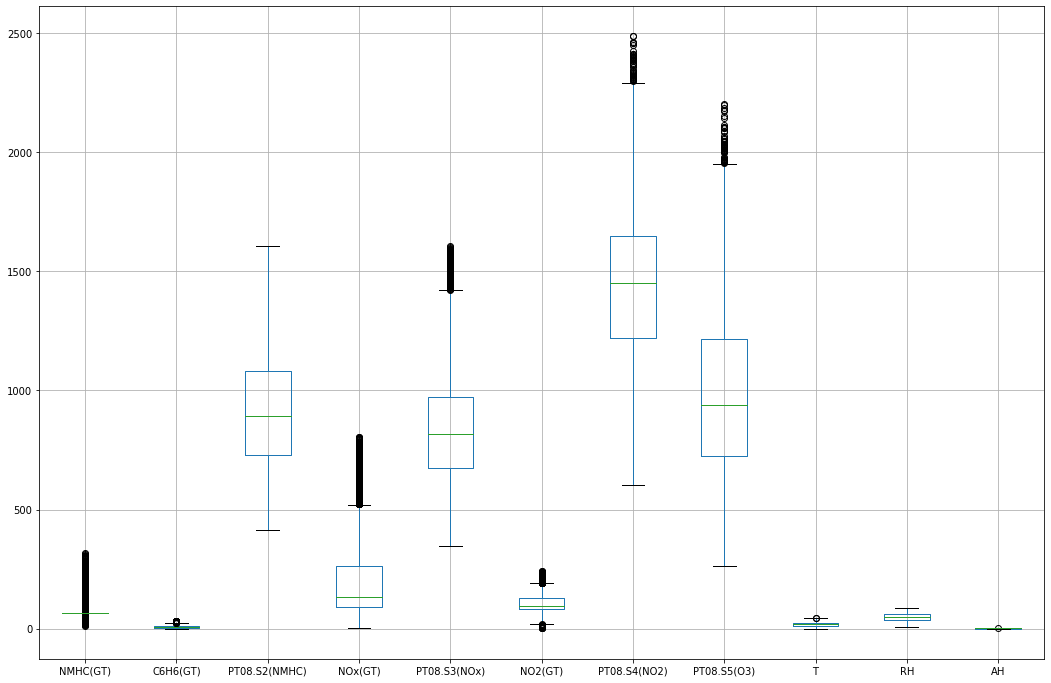

In [30]:
df_tratado.boxplot(figsize=(18,12), column=['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']);

## Realizando algumas análises

In [31]:
#from datetime import date
#from datetime import datetime
dia_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-Feira','Sexta-feira','Sábado']

In [32]:
# Adiciona o dia da semana no dataset
#df_tratado['WeekDayName'] = df_tratado.Date.dt.weekday_name
df_tratado['WeekDayName'] = df_tratado.Date.apply(lambda x: dia_semana[int(x.strftime('%w'))])

In [33]:
# Altera a posição da coluna criada.
df_tratado = df_tratado[['Date','WeekDayName','Time','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']]


In [34]:
# Visualiza a concentração de CO por dia da seman, em ordem descrescente.
df_co_dia_semana = df_tratado.groupby('WeekDayName', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
df_co_dia_semana

,WeekDayName,PT08.S1(CO)
2,Quinta-Feira,1325665.0
5,Sábado,1320912.0
0,Domingo,1316212.0
3,Segunda-feira,1294060.0
4,Sexta-feira,1269513.0
6,Terça-feira,1264345.0
1,Quarta-feira,1237464.0


In [35]:
# Visualiza a concentração de CO por hora, em ordem descrescente.
df_co_hora = df_tratado.groupby('Time', as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
df_co_hora

,Time,PT08.S1(CO)
23,23.00.00,399178.0
12,12.00.00,398809.0
16,16.00.00,398385.0
7,07.00.00,398149.0
22,22.00.00,397204.0
13,13.00.00,393021.0
21,21.00.00,392350.0
17,17.00.00,390725.0
14,14.00.00,390142.0
0,00.00.00,389890.0


In [36]:
# Visualiza a concentração de CO por dia da semana e hora, em ordem descrescente.
df_dia_semana_hora = df_tratado.groupby(['WeekDayName', 'Time'], as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
df_dia_semana_hora

,WeekDayName,Time,PT08.S1(CO)
79,Segunda-feira,07.00.00,61383.0
19,Domingo,19.00.00,61172.0
80,Segunda-feira,08.00.00,61021.0
20,Domingo,20.00.00,60858.0
71,Quinta-Feira,23.00.00,60591.0
...,...,...,...
148,Terça-feira,04.00.00,42965.0
77,Segunda-feira,05.00.00,42562.0
75,Segunda-feira,03.00.00,42367.0
28,Quarta-feira,04.00.00,41844.0


In [37]:
# Visualiza a concentração de COs por por hora nas Quartas-feiras, em ordem descrescente.
df_dia_semana_hora = df_tratado[df_tratado.WeekDayName == 'Quarta-feira'].groupby(['WeekDayName', 'Time'], as_index = False).agg({'PT08.S1(CO)': 'sum'}).sort_values(by='PT08.S1(CO)', ascending=False)
df_dia_semana_hora

,WeekDayName,Time,PT08.S1(CO)
22,Quarta-feira,22.00.00,59809.0
23,Quarta-feira,23.00.00,58056.0
16,Quarta-feira,16.00.00,56141.0
13,Quarta-feira,13.00.00,56073.0
7,Quarta-feira,07.00.00,55942.0
11,Quarta-feira,11.00.00,55314.0
12,Quarta-feira,12.00.00,54573.0
0,Quarta-feira,00.00.00,54196.0
14,Quarta-feira,14.00.00,54090.0
21,Quarta-feira,21.00.00,53735.0


In [38]:
df_tratado.to_csv('df_tratado_semana.csv', sep=';', decimal=',')

In [39]:
df_tratado.set_index(['Date', 'Time'])

WeekDayName  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Date       Time                                                       
2004-10-03 18.00.00        Domingo       1360.0     150.0      11.9   
           19.00.00        Domingo       1292.0     112.0       9.4   
           20.00.00        Domingo       1402.0      88.0       9.0   
           21.00.00        Domingo       1376.0      80.0       9.2   
           22.00.00        Domingo       1272.0      51.0       6.5   
...                            ...          ...       ...       ...   
2005-04-04 10.00.00  Segunda-feira       1314.0      66.0      13.5   
           11.00.00  Segunda-feira       1163.0      66.0      11.4   
           12.00.00  Segunda-feira       1142.0      66.0      12.4   
           13.00.00  Segunda-feira       1003.0      66.0       9.5   
           14.00.00  Segunda-feira       1071.0      66.0      11.9   

                     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
Date       Time                                                      
2004-10-03 18.00.00         1046.0    166.0        1056.0    113.0   
           19.00.00          955.0    103.0        1174.0     92.0   
           20.00.00          939.0    131.0        1140.0    114.0   
           21.00.00          948.0    172.0        1092.0    122.0   
           22.00.00          836.0    131.0        1205.0    116.0   
...                            ...      ...           ...      ...   
2005-04-04 10.00.00         1101.0    472.0         539.0    190.0   
           11.00.00         1027.0    353.0         604.0    179.0   
           12.00.00         1063.0    293.0         603.0    175.0   
           13.00.00          961.0    235.0         702.0    156.0   
           14.00.00         1047.0    265.0         654.0    168.0   

                     PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
Date       Time                                                     
2004-10-03 18.00.00        1692.0       1268.0  13.6  48.9  0.7578  
           19.00.00        1559.0        972.0  13.3  47.7  0.7255  
           20.00.00        1555.0       1074.0  11.9  54.0  0.7502  
           21.00.00        1584.0       1203.0  11.0  60.0  0.7867  
           22.00.00        1490.0       1110.0  11.2  59.6  0.7888  
...                           ...          ...   ...   ...     ...  
2005-04-04 10.00.00        1374.0       1729.0  21.9  29.3  0.7568  
           11.00.00        1264.0       1269.0  24.3  23.7  0.7119  
           12.00.00        1241.0       1092.0  26.9  18.3  0.6406  
           13.00.00        1041.0        770.0  28.3  13.5  0.5139  
           14.00.00        1129.0        816.0  28.5  13.1  0.5028  

[8373 rows x 13 columns]

In [40]:
# Visualizado os dados agrupados por ano
df_ar.set_index('Date')
grupos = df_ar.groupby(pd.Grouper(freq='Y'))
df_anos = pd.DataFrame()

for nome, grupo in grupos:
    df_anos[nome.year] = grupo.values.squeeze()
df_anos.boxplot(figsize=(12,8))

plt.title('Qtd Passageiros agrupados por ano')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
# Distribuição dos atributos dos dataset
df_ar.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

### Verificando a correlação dos Dados

In [ ]:
# Plota o gráfico de correlação dos dados.
plt.figure(figsize=(12,10))
ax1 = sns.heatmap(df_ar.corr(),linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={"size": 9})
plt.title('Correlação dos dados\n')
plt.show()

# Preparando os dados para criação do Modelo de Previsão

In [ ]:
# Dividindo os atributos do dataframe 

# Previsores
X = df_car.iloc[:, 0:6].values

# Target
y = df_car.iloc[:,6].values.astype('str')

In [ ]:
print('Shape dos dados de X e y')
print(X.shape)
print(y.shape)

In [ ]:
# Transforma os valores categóricos em valores inteiros
from sklearn.preprocessing import LabelEncoder
x_label_encoder = LabelEncoder()
y_label_encoder  = LabelEncoder()

# Valores de X (previsores). Altera o Shape dos dados de X.
X_le = x_label_encoder.fit_transform(X.ravel())

# Valores de Y (alvo)
y_le = y_label_encoder.fit_transform(y)

In [ ]:
y_le.shape

In [ ]:
X_le.shape

In [ ]:
# Alterando o Shape do array pra ficar igual ao original, após a condificação.
X_le = X_le.reshape(X.shape)
X_le.shape

In [ ]:
# Gerando vetores binários para cada valor inteiro
from sklearn.preprocessing import OneHotEncoder

x_oneHot = OneHotEncoder(categories='auto')

In [ ]:
# Codificando os valores de X em vetores binários
X_oh = x_oneHot.fit_transform(X_le.reshape(X.shape)).toarray()
X_oh

In [ ]:
# Fazendo a Padronização dos dados
from sklearn.preprocessing import StandardScaler

#Padroniza os dados de X
scale_x = StandardScaler()
X_p = scale_x.fit_transform(X_oh.astype(float))

In [ ]:
X_p.shape

In [ ]:
X_p

# Testando Alguns Modelos de Machine Learning

In [ ]:
# Importando as bibliotecas dos modelos
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

In [ ]:
# Defindo os parâmetos do FOLD
qtd_instancias = len(X_p)
qtd_folds = 23
seed = 7

# Criando a lista de modelos para avaliação.
modelos = []
modelos.append(('AdaBoostClassifier', AdaBoostClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=10)))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)))
modelos.append(('SVC', SVC()))
modelos.append(('xgboost', xgboost.XGBClassifier()))

In [ ]:
# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []

# Treina os Modelos
for nome_modelo, modelo in modelos:
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed)
    #print(nome_modelo)
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, X_p, y_le.ravel(), cv=kfold, scoring='accuracy')
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append( tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)        
    
    print("\n%s: Acurácia: %.4f (Desvio Padrão: %.4f)"  % (nome_modelo, resultados_cros_val.mean(), resultados_cros_val.std()) )
    print('Tempo de Treinamento: %s segundos' % tempo_modelo )    

In [ ]:
#Plota um gráfico de Comparação dos Algoritmos de Classificação

# Prepara os dados do Plot
resul_AdaBoostClassifier = resultados[0]
resul_GradientBoostingClassifier = resultados[1]
resul_RandomForestClassifier = resultados[2]
resul_ExtraTreesClassifier = resultados[3]
resul_DecisionTreeClassifier = resultados[4]
resul_KNeighborsClassifier = resultados[5]
resul_GaussianNB = resultados[6]
resul_LogisticRegression = resultados[7]
#resul_LogisticRegressionCV = resultados[8]
resul_SVC = resultados[8]
resul_xgboost = resultados[9]

# Configura o Plot.
trace0= go.Box(y=resul_AdaBoostClassifier , name = 'AdaBoostClassifier ')
trace1= go.Box(y=resul_GradientBoostingClassifier , name = 'GradientBoostingClassifier ')
trace2= go.Box(y=resul_RandomForestClassifier , name = 'RandomForestClassifier ')
trace3= go.Box(y=resul_ExtraTreesClassifier , name = 'ExtraTreesClassifier ')
trace4= go.Box(y=resul_DecisionTreeClassifier , name = 'DecisionTreeClassifier ')
trace5= go.Box(y=resul_KNeighborsClassifier , name = 'KNeighborsClassifier ')
trace6= go.Box(y=resul_GaussianNB , name = 'GaussianNB ')
trace7= go.Box(y=resul_LogisticRegression , name = 'LogisticRegression ')
trace8= go.Box(y=resul_SVC , name = 'SVC ')
trace9= go.Box(y=resul_xgboost , name = 'xgboost', )

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(yaxis=dict(title='acurácia') ,title='Comparação dos Algoritmos de Classificação', showlegend=False)
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )

In [ ]:
#Plota um gráfico de Comparação dos Tempo de treinamentodos Algoritmos de Classificação
cores = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)']

trace0= go.Bar(y=tempo_treinamento_modelos, x=nomes_modelos, textposition = 'auto', text=tempo_treinamento_modelos,  marker=dict(color=cores),opacity=0.7  )
data=[trace0]

layout = go.Layout(yaxis=dict(title='segundos') ,title='Tempo para treinamento dos Algoritmos de Classificação')
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )


# Escolhendo um Modelo de Previsão

In [ ]:
# O algoritmo de classificação que obteve o melhor resultado, apesar do maior tempo para treinamento, foi o GradientBoostingClassifier. Vamos selecionar ele.
# Criando o Modelo
classificador = GradientBoostingClassifier(n_estimators=200)

In [ ]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_p, y_le, test_size = 0.3)

In [ ]:
print('Shape dos dados de Treinamento')
print(X_treinamento.shape)
print(y_treinamento.shape)

In [ ]:
print('Shape dos dados de Teste')
print(X_teste.shape)
print(y_teste.shape)

In [ ]:
# Treinando o modelo selecionado
classificador.fit(X_treinamento, y_treinamento);

In [ ]:
# Realiza a previsão com os dados de Teste
y_previsto = classificador.predict(X_teste)

In [ ]:
# Identificando o nome da classe de acordo com a codificação
#acc = 0  #good = 1 #unacc = 2 #vgood = 3
nome_classe = ['acc', 'good', 'unacc', 'vgood']

In [ ]:
# Relatório de Classificação
#precision -  daqueles que classifiquei como corretos, quantos efetivamente estavam corretos? 
#recall    -  quando realmente é da classe XPTO, o quão frequente você classifica como XPTO?
#f1-score  -  balanço entre a precisão e o recall. Combina precisão e recall em um número único que indique a qualidade geral do seu modelo (quanto maior melhor o modelo).
#support   -  número de ocorrência de cada classe.

from sklearn.metrics import classification_report
relatorio_classificacao = classification_report(y_teste, y_previsto, target_names=nome_classe ,digits=4)

# Imprimindo o relatório
print('\tRelatório de Classificação do modelo')
print(relatorio_classificacao)

In [ ]:
# Visualizar a Matriz de confusão (confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto) 

df_cm = pd.DataFrame(cm, nome_classe,  nome_classe)

print('Obs.: Nas linhas temos as Classes reais e nas colunas as Classes previstas.\n')
print('\tMatriz de Confusão')
df_cm

# Exibindo os dados de Teste após a Previsão

In [ ]:
# Reverte a alteração da escala feita anteriormente
X_teste_scale = scale_x.inverse_transform(X_teste)
X_teste_scale.shape

In [ ]:
# Reverte a alteração do onehot feita anteriormente
X_teste_oh = x_oneHot.inverse_transform(X_teste_scale)
X_teste_oh.shape

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
X_teste_le = x_label_encoder.inverse_transform(X_teste_oh.ravel())
X_teste_le.shape

In [ ]:
X_teste_le = X_teste_le.reshape(X_teste_oh.shape)
X_teste_le.shape

In [ ]:
df_previsores = pd.DataFrame(X_teste_le, columns=['BUYING', 'MAINT', 'DOORS', 'PERSONS' , 'LUG_BOOT', 'SAFETY'])
#df_previsores.head()

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_previsto_it = y_label_encoder.inverse_transform(y_previsto.ravel())

In [ ]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_teste_it = y_label_encoder.inverse_transform(y_teste.ravel())

In [ ]:
# Dataframe com a classe Real
df_prev = pd.DataFrame(y_previsto_it, columns=['CLASSE_PREVISTA'])

# Dataframe com a classe Prevista
df_real = pd.DataFrame(y_teste_it, columns=['CLASSE_REAL'])

# Juntando os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['CLASSE_PREVISTA_CORRETAMENTE'] = df_target.CLASSE_PREVISTA == df_target.CLASSE_REAL


In [ ]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [ ]:
# Exibindo somente os registros onde houve erro na previsão da classe.
df_merge[df_merge.CLASSE_PREVISTA_CORRETAMENTE==False]

In [ ]:
# Exibindo a quantidade.
df_merge.groupby(['CLASSE_PREVISTA_CORRETAMENTE']).count()